In [19]:
# Author: Muriki Gusmão Yamanaka

# Pertinent material:
# Filtering > https://www.analyticsvidhya.com/blog/2021/08/sharpening-an-image-using-opencv-library-in-python/
# Sampling  > https://maelfabien.github.io/computervision/cv_3/#
# Sampling  > https://theailearner.com/tag/cv2-pyrdown/

import cv2 as cv
import matplotlib
import numpy as np
import math
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, interact_manual

# Utils:
#plt.imsave('Assets/raw_expand.png', img_resized)  #Save image

img_src = cv.imread('./Assets/Fallen_angel.jpg')         #Import image
img_color = cv.cvtColor(img_src, cv.COLOR_BGR2RGB) #Change image color to RGB
img_gray = cv.cvtColor(img_src, cv.COLOR_BGR2GRAY) #Change image to gray

# Threshold
    thresholding is the simplest method of segmenting images. From a grayscale image, thresholding can be used to create binary images.

In [2]:
thresh_methods = ['BINARY', 'BINARY-INV', 'TRUNC', 'TOZERO', 'TOZERO-INV']

def threshold (scale, Method):
    if Method == 'BINARY':
        ret,output = cv.threshold(img_gray,scale,255,cv.THRESH_TRUNC)
    elif Method == 'BINARY-INV':
        ret,output = cv.threshold(img_gray,scale,255,cv.THRESH_BINARY_INV)
    elif Method == 'TRUNC':
        ret,output = cv.threshold(img_gray,scale,255,cv.THRESH_TRUNC)
    elif Method == 'TOZERO':
        ret,output = cv.threshold(img_gray,scale,255,cv.THRESH_TOZERO)
    elif Method == 'TOZERO-INV':
        ret,output = cv.threshold(img_gray,scale,255,cv.THRESH_TOZERO_INV)
        
    fig, axes = plt.subplots(1, 2, figsize=(14, 12))
    axes[0].imshow(img_gray, 'gray')
    axes[1].imshow(output, 'gray')
    
interactive(threshold, scale=(0, 255), Method = thresh_methods)

interactive(children=(IntSlider(value=127, description='scale', max=255), Dropdown(description='Method', optio…

# Filtering
    Filtering is a neighborhood operation, in which the value of any given pixel in the output image is determined by applying some algorithm to the values of the pixels in the neighborhood of the corresponding input pixel. A pixel's neighborhood is some set of pixels, defined by their locations relative to that pixel.
    The crucial point to know when you are working with image processing tasks is that the formula does not differ greatly, and the type of kernel that you use affects the operation you are performing on the image. Because it is the kernel that brings about a change in pixel formation and intensity when multiplied with the pixels in the original image.

### Linear Filtering

In [3]:
# identity kernel
linear_kernel = np.array([[0, 0, 0],
                          [0, 1, 0],
                          [0, 0, 0]])

def filtering():
    output = cv.filter2D(src=img_gray, ddepth=-1, kernel=linear_kernel)
    fig, axes = plt.subplots(1, 2, figsize=(14, 12))
    axes[0].imshow(img_gray, 'gray')
    axes[1].imshow(output, 'gray')

interactive(filtering)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

### Sharpening

In [16]:
# Sharpening kernel
sharp_kernel = np.array([[-1, -1,  -1],
                         [-1,  9,  -1],
                         [-1, -1,  -1]])

def sharpening():
    output = cv.filter2D(src=img_gray, ddepth=-1, kernel=sharp_kernel)        
    fig, axes = plt.subplots(1, 2, figsize=(14, 12))
    axes[0].imshow(img_gray, 'gray')
    axes[1].imshow(output, 'gray') 

interactive(sharpening)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

### Gaussian Filtering

In [7]:
def gaussian(Kernel_len):
    output = cv.GaussianBlur(img_gray,(Kernel_len,Kernel_len),cv.BORDER_DEFAULT)
    fig, axes = plt.subplots(1, 2, figsize=(14, 12))
    axes[0].imshow(img_gray, 'gray')
    axes[1].imshow(output, 'gray')
    
interactive(gaussian, Kernel_len = (1,9,2))

interactive(children=(IntSlider(value=5, description='Kernel_len', max=9, min=1, step=2), Output()), _dom_clas…

### Edge Detection

In [17]:
# Edge detection kernel
edge_kernel1 = np.array([[1,  0, -1],
                         [0,  0,  0],
                         [-1, 0,  1]])

edge_kernel2 = np.array([[0,  -1,  0],
                         [-1,  4, -1],
                         [0,  -1,  0]])

edge_kernel3 = np.array([[-1,  -1,  -1],
                         [-1,   8,  -1],
                         [-1,  -1,  -1]])
 
def edges(kernel_type):
    if kernel_type == 1:
        output = cv.filter2D(src=img_gray, ddepth=-1, kernel=edge_kernel1)
    elif kernel_type == 2:
        output = cv.filter2D(src=img_gray, ddepth=-1, kernel=edge_kernel2)
    elif kernel_type == 3:
        output = cv.filter2D(src=img_gray, ddepth=-1, kernel=edge_kernel3)
                
    fig, axes = plt.subplots(1, 2, figsize=(14, 12))
    axes[0].imshow(img_gray, 'gray')
    axes[1].imshow(output, 'gray')

interactive(edges, kernel_type=(1,3))

interactive(children=(IntSlider(value=2, description='kernel_type', max=3, min=1), Output()), _dom_classes=('w…

# Image Scaling
    Use of the opencv function "resize()" to change images scale¶

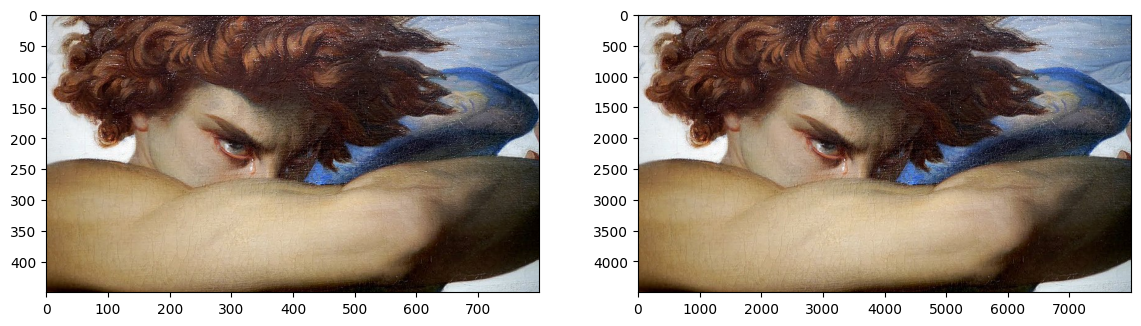

In [8]:
scale_percent = 1000
width = int(img_color.shape[1] * scale_percent / 100)
height = int(img_color.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
output = cv.resize(img_color, dim, interpolation = cv.INTER_AREA)

fig, axes = plt.subplots(1, 2, figsize=(14, 12))
axes[0].imshow(img_color, 'gray')
axes[1].imshow(output, 'gray')

# Image Sampling
    Image sampling involves the process of selecting pixels from an original image to create a new one. This new image is referred to as the sample and is used to determine the resolution of an image.
    Why blurring? Because this reduces the aliasing or ringing effects that may arise if we downsample directly

### SubSample

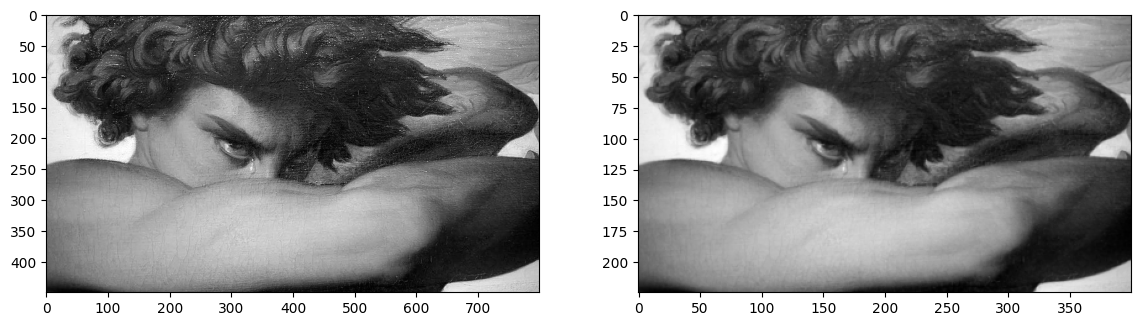

In [8]:
output = cv.pyrDown(img_gray)

fig, axes = plt.subplots(1, 2, figsize=(14, 12))
axes[0].imshow(img_gray, 'gray')
axes[1].imshow(output, 'gray')

### UpSample

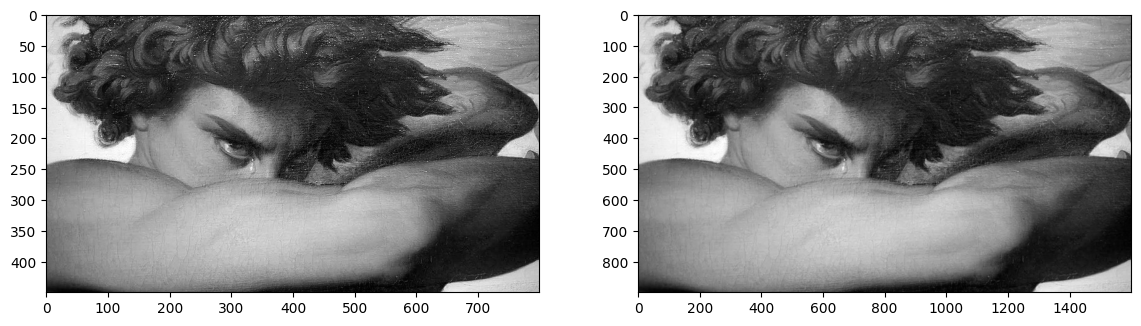

In [17]:
output = cv.pyrUp(img_gray)
    
fig, axes = plt.subplots(1, 2, figsize=(14, 12))
axes[0].imshow(img_gray, 'gray')
axes[1].imshow(output, 'gray')